In [0]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [0]:
train = pd.read_csv('/content/train_jqd04QH.csv')
test = pd.read_csv('/content/test_KaymcHn.csv')
sub = pd.read_csv('/content/sample_submission_sxfcbdx.csv')

In [3]:
print (train.head())
print (train.shape)


   enrollee_id      city  ...  training_hours target
0        23798  city_149  ...             106      0
1        29166   city_83  ...              69      0
2           46   city_16  ...               4      0
3        18527   city_64  ...              26      0
4        21751  city_100  ...              88      1

[5 rows x 14 columns]
(18359, 14)


In [4]:
print (test.head())
print (test.shape)

   enrollee_id      city  ...  last_new_job training_hours
0        16548   city_33  ...           NaN             15
1        12036   city_28  ...             1             94
2        11061  city_103  ...             1             17
3         5032  city_104  ...             2             76
4        17599   city_77  ...             2             65

[5 rows x 13 columns]
(15021, 13)


In [5]:
train.isnull().any()

enrollee_id               False
city                      False
city_development_index    False
gender                     True
relevent_experience       False
enrolled_university        True
education_level            True
major_discipline           True
experience                 True
company_size               True
company_type               True
last_new_job               True
training_hours            False
target                    False
dtype: bool

In [0]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [0]:
test.isnull().any()

enrollee_id               False
city                      False
city_development_index    False
gender                     True
relevent_experience       False
enrolled_university        True
education_level            True
major_discipline           True
experience                 True
company_size               True
company_type               True
last_new_job               True
training_hours            False
dtype: bool

In [0]:
test.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    3388
relevent_experience          0
enrolled_university        279
education_level            395
major_discipline          2393
experience                  44
company_size              4051
company_type              4330
last_new_job               304
training_hours               0
dtype: int64

In [0]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


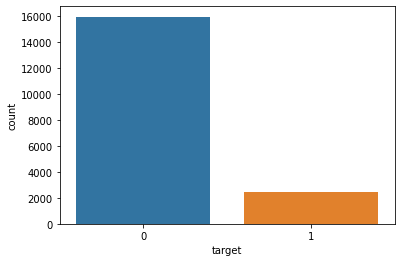

In [0]:
import seaborn as sns
sns.countplot(train['target'])

Imbalanced Dataset

In [0]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [0]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [0]:
miss = train.isnull().sum()/len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

experience             0.003214
enrolled_university    0.018628
last_new_job           0.019990
education_level        0.024892
major_discipline       0.154584
gender                 0.223215
company_size           0.260308
company_type           0.274470
dtype: float64

In [0]:
numeric_data = train.select_dtypes(include=[np.number])

In [0]:
del numeric_data['enrollee_id']

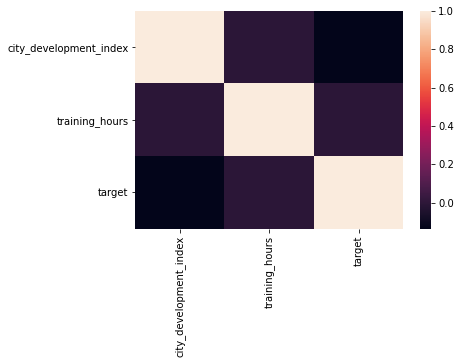

In [0]:
corr = numeric_data.corr()
sns.heatmap(corr)

In [0]:
print (corr['target'].sort_values(ascending=False))

target                    1.000000
training_hours           -0.004735
city_development_index   -0.135700
Name: target, dtype: float64


No correaltion between numeric values

#Impute Missing Values

In [0]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [0]:
df =train

In [29]:
data= train.append(test)
data.shape



(33380, 14)

In [0]:
train['company_size'] = train['company_size'].str.replace('<','')
train['experience'] = train['experience'].str.replace('>','')
train['last_new_job'] = train['last_new_job'].str.replace('>','')
train['company_size'] = train['company_size'].str.replace('+','')
train['experience'] = train['experience'].str.replace('<','')

In [0]:
# Gender feature imputed with mode & converted to categorical
train['gender']=train['gender'].map({'Male':1,'Female':0,'Other':2})
train['gender']=train['gender'].fillna(1).astype('int')


In [64]:
train['gender'].value_counts()

1    16982
0     1188
2      189
Name: gender, dtype: int64

In [65]:
train['enrolled_university'].value_counts()

no_enrollment       13659
Full time course     3187
Part time course     1171
Name: enrolled_university, dtype: int64

In [0]:
train['enrolled_university']=train['enrolled_university'].fillna('no_enrollment')

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['enrolled_university']=le.fit_transform(train['enrolled_university'])

In [68]:
train['education_level'].value_counts()

Graduate          10769
Masters            4319
High School        2032
Phd                 459
Primary School      323
Name: education_level, dtype: int64

In [0]:
train['education_level']=train['education_level'].fillna('Graduate')
train['education_level']=le.fit_transform(train['education_level'])

In [70]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [71]:
train['major_discipline'].value_counts()

STEM               13738
Humanities           688
Other                343
Business Degree      307
Arts                 239
No Major             206
Name: major_discipline, dtype: int64

In [0]:
train['major_discipline']=train['major_discipline'].fillna('STEM')
train['major_discipline']=le.fit_transform(train['major_discipline'])

In [73]:
train['experience'].value_counts()


20    3583
5     1309
4     1250
3     1159
6     1125
2      992
9      979
10     967
7      950
1      868
8      755
15     695
11     667
14     602
16     549
12     497
13     412
17     347
19     308
18     286
Name: experience, dtype: int64

In [0]:
train['experience']=train['experience'].fillna('20')
train['experience']=le.fit_transform(train['experience'])

In [76]:
train['company_size'].value_counts()

50-99        3120
100-500      2698
10000        2044
10/49        1466
1000-4999    1399
10           1360
500-999       902
5000-9999     591
Name: company_size, dtype: int64

In [0]:
train['company_size'].replace({'10':'Startup','10/49':'Tier_0','50-99':'Tier_1','100-500':'Tier_2','500-999':'Tier_3',
                            '1000-4999':'Tier_4','5000-9999':'Tier_5','10000':'Tier_6'},inplace=True)


In [0]:
train['company_size'].fillna('unknown', inplace=True)
#df['race'].fillna(df.race.mode(), inplace=True)
#combine['company_size'].fillna("Unknown", inplace=True)

In [87]:
train['company_size'].value_counts()

unknown    4779
Tier_1     3120
Tier_2     2698
Tier_6     2044
Tier_0     1466
Tier_4     1399
Startup    1360
Tier_3      902
Tier_5      591
Name: company_size, dtype: int64

In [88]:
train['last_new_job'].value_counts()

1        7567
4        4377
2        2835
never    2186
3        1027
Name: last_new_job, dtype: int64

In [0]:
train['last_new_job'].replace({'never':'0'},inplace=True)

In [0]:
train['last_new_job']=train['last_new_job'].fillna(1)
train['last_new_job']=train['last_new_job'].astype('int')

In [96]:
train['company_type'].value_counts()

Pvt Ltd                10051
Funded Startup          1038
Public Sector            996
Early Stage Startup      582
NGO                      534
Other                    119
Name: company_type, dtype: int64

In [0]:
train['company_type']=train['company_type'].fillna('Unkown')
train['company_type']=le.fit_transform(train['company_type'])



In [99]:
train.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [100]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,1,Has relevent experience,2,0,5,13,Tier_2,5,1,106,0
1,29166,city_83,0.923,1,Has relevent experience,2,0,5,5,Startup,1,1,69,0
2,46,city_16,0.910,1,Has relevent experience,2,0,5,16,Tier_1,4,2,4,0
3,18527,city_64,0.666,1,Has relevent experience,2,0,5,5,Tier_1,5,1,26,0
4,21751,city_100,0.887,1,No relevent experience,2,2,5,18,unknown,6,2,88,1


In [0]:
https://www.geeksforgeeks.org/numpy-log-python/

In [101]:
train['training_hours'] = np.log(train['training_hours'])
train['training_hours'].describe()



count    18359.000000
mean         3.765266
std          0.993060
min          0.000000
25%          3.135494
50%          3.850148
75%          4.488636
max          5.817111
Name: training_hours, dtype: float64

#No Missing Values

In [0]:
train.drop(['enrollee_id','city'],1,inplace=True)

In [0]:
df = train

In [106]:

df = pd.get_dummies(df)
df.shape



(18359, 21)

In [107]:
df.head()

,city_development_index,gender,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,company_size_Startup,company_size_Tier_0,company_size_Tier_1,company_size_Tier_2,company_size_Tier_3,company_size_Tier_4,company_size_Tier_5,company_size_Tier_6,company_size_unknown
0,0.689,1,2,0,5,13,5,1,4.663439,0,1,0,0,0,0,1,0,0,0,0,0
1,0.923,1,2,0,5,5,1,1,4.234107,0,1,0,1,0,0,0,0,0,0,0,0
2,0.910,1,2,0,5,16,4,2,1.386294,0,1,0,0,0,1,0,0,0,0,0,0
3,0.666,1,2,0,5,5,5,1,3.258097,0,1,0,0,0,1,0,0,0,0,0,0
4,0.887,1,2,2,5,18,6,2,4.477337,1,0,1,0,0,0,0,0,0,0,0,1


#Model

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [119]:
#set seed for same results everytime
seed=0
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics

X=df.drop('target',1)
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =1)

#declare the models
lr = LogisticRegression()
rf=RandomForestClassifier()
adb=ensemble.AdaBoostClassifier()
bgc=ensemble.BaggingClassifier()
gnb = GaussianNB()
knn=KNeighborsClassifier()
dt = DecisionTreeClassifier()
# ab_rf = AdaBoostClassifier(base_estimator=rf,random_state=0)
# ab_dt = AdaBoostClassifier(base_estimator=dt,random_state=0)
# ab_nb=  AdaBoostClassifier(base_estimator=gnb,random_state=0)
# ab_lr=  AdaBoostClassifier(base_estimator=lr,random_state=0)
bgcl_lr = BaggingClassifier(base_estimator=lr, random_state=0)

# ,ab_rf,ab_dt,ab_nb,ab_lr,bgcl_lr

models=[lr,rf,adb,bgc,gnb,knn,dt,bgcl_lr]
sctr,scte,auc,ps,rs=[],[],[],[],[]
def ens(X_train,X_test, y_train, y_test):
    for model in models:
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)
            #predict(self, X) Predict class labels for samples in X.
          
            y_test_pred_new=model.predict_proba(X_test)
            # #predict_proba(self, X) Probability estimates.
            y_test_pred_new=y_test_pred_new[:,1]
            train_score=model.score(X_train,y_train)
            test_score=model.score(X_test,y_test)
            p_score=metrics.precision_score(y_test,y_test_pred)
            r_score=metrics.recall_score(y_test,y_test_pred)
            
            ac=metrics.roc_auc_score(y_test,y_test_pred_new)
            
            sctr.append(train_score)
            scte.append(test_score)
            ps.append(p_score)
            rs.append(r_score)
            auc.append(ac)
    return sctr,scte,auc,ps,rs
ens(X_train,X_test, y_train, y_test)
# 'ab_rf','ab_dt','ab_nb','ab_lr','bgcl_lr'
ensemble=pd.DataFrame({'names':['Logistic Regression','Random Forest','Ada boost','Bagging',
                                'Naive-Bayes','KNN','Decistion Tree',
                                'bagged LR'],
                       'auc_score':auc,'training':sctr,'testing':scte,'precision':ps,'recall':rs})
ensemble=ensemble.sort_values(by='auc_score',ascending=False).reset_index(drop=True)
ensemble

,names,auc_score,training,testing,precision,recall
0,Ada boost,0.658746,0.866617,0.870643,0.142857,0.002128
1,bagged LR,0.642673,0.866957,0.872004,0.000000,0.000000
2,Logistic Regression,0.641915,0.866957,0.872004,0.000000,0.000000
3,Naive-Bayes,0.615181,0.793423,0.798747,0.211991,0.210638
4,Random Forest,0.598095,0.998706,0.861111,0.187500,0.025532
5,Bagging,0.573301,0.976782,0.855120,0.196078,0.042553
6,KNN,0.556839,0.874651,0.856209,0.204082,0.042553
7,Decistion Tree,0.528166,0.998774,0.781318,0.172888,0.187234


# SMOTE:Data Balancing

In [0]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)